In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_csv("Dataset.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [16]:
df.drop(columns = ["Loan_ID"], inplace = True)

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

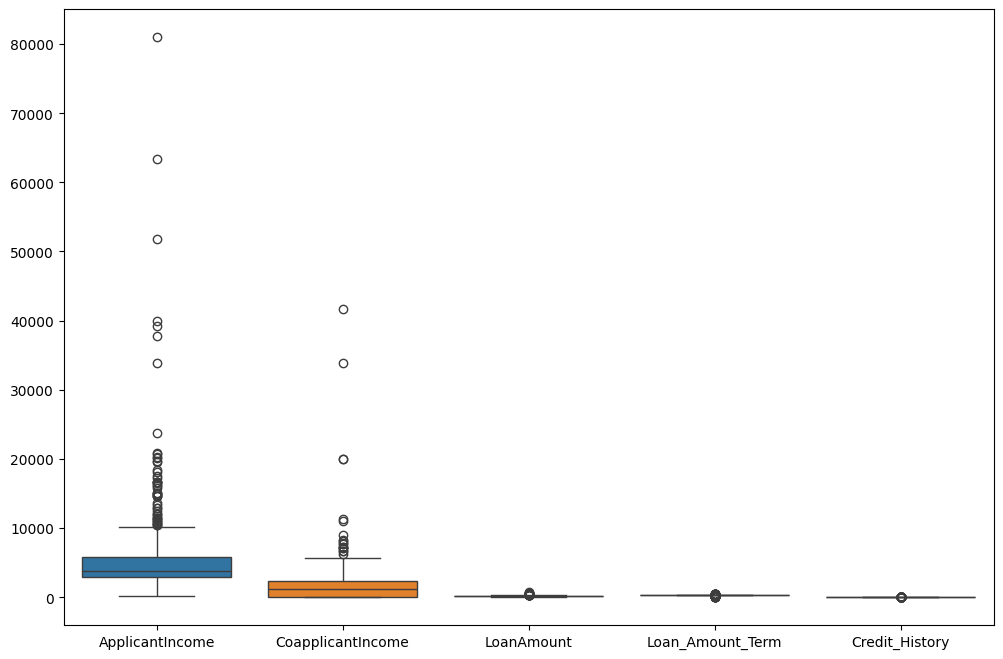

In [ ]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df )

In [8]:
df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mean())
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mean())


In [9]:
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"] = df["Married"].fillna(df["Married"].mode()[0])
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])
df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])


In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

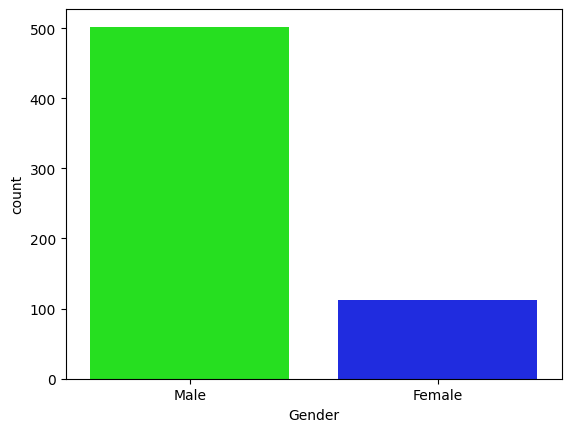

In [ ]:
sns.countplot(x='Gender', data=df, palette='hsv')

<Axes: xlabel='Married', ylabel='count'>

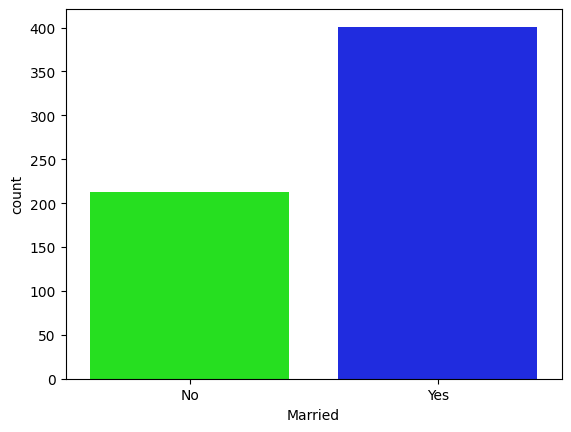

In [12]:
sns.countplot(x='Married', data=df, palette='hsv')

<Axes: xlabel='Education', ylabel='count'>

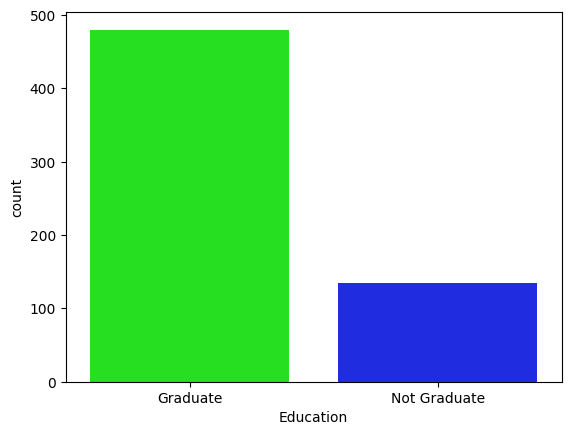

In [13]:
sns.countplot(x="Education", data=df, palette='hsv')    

In [21]:
corr = df.select_dtypes(include=['number']).corr()
print(corr)

                   ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome           1.000000          -0.116605    0.565181   
CoapplicantIncome        -0.116605           1.000000    0.189218   
LoanAmount                0.565181           0.189218    1.000000   
Loan_Amount_Term         -0.045242          -0.059675    0.039235   
Credit_History           -0.014477          -0.001665   -0.007031   

                   Loan_Amount_Term  Credit_History  
ApplicantIncome           -0.045242       -0.014477  
CoapplicantIncome         -0.059675       -0.001665  
LoanAmount                 0.039235       -0.007031  
Loan_Amount_Term           1.000000        0.001395  
Credit_History             0.001395        1.000000  


<Axes: >

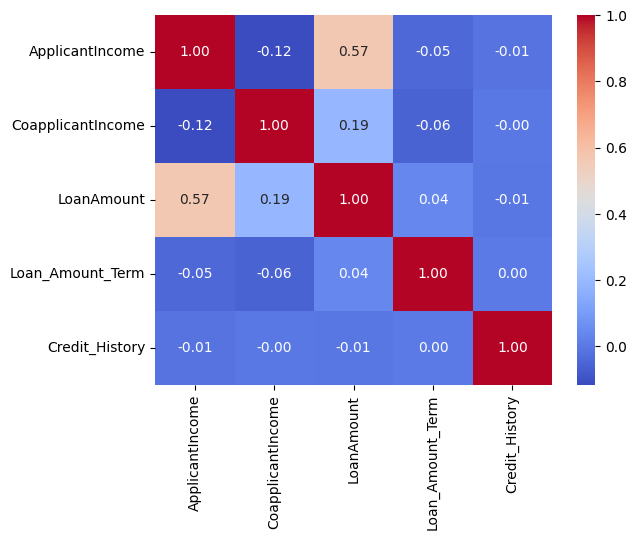

In [23]:
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

In [25]:
df["Total_Applicant_income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


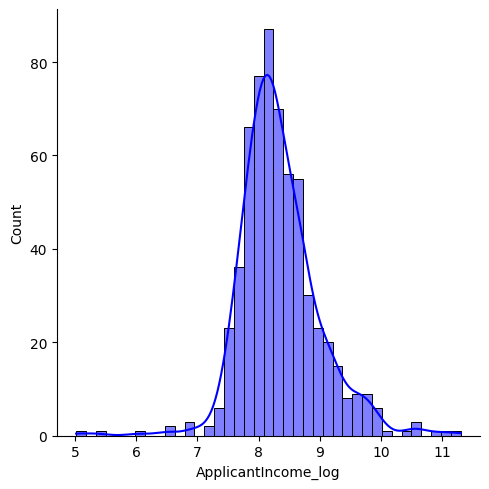

In [26]:
df["ApplicantIncome_log"] = np.log(df["ApplicantIncome"]+1 )
sns.displot(df["ApplicantIncome_log"], kde=True, color="blue")

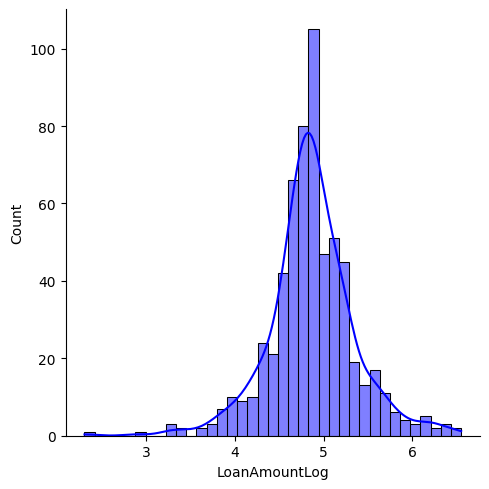

In [27]:
df["LoanAmountLog"] = np.log(df["LoanAmount"]+1 )
sns.displot(df["LoanAmountLog"], kde=True, color="blue")

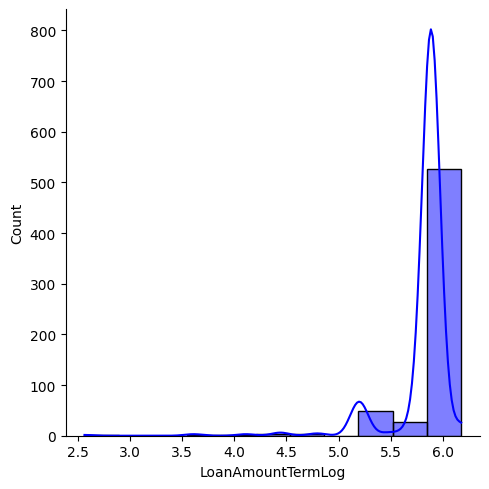

In [28]:
df["LoanAmountTermLog"] = np.log(df["Loan_Amount_Term"]+1 )
sns.displot(df["LoanAmountTermLog"], kde=True, color="blue")

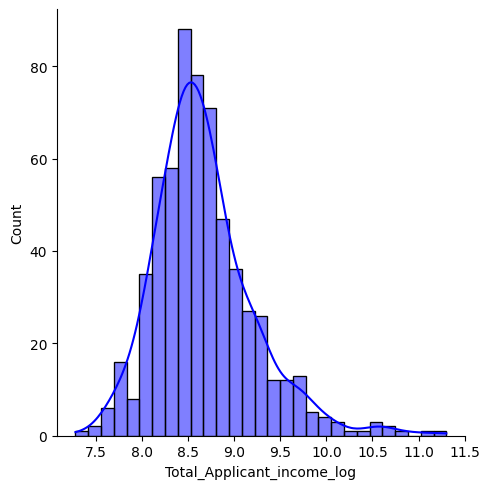

In [29]:
df["Total_Applicant_income_log"] = np.log(df["Total_Applicant_income"]+1 )  
sns.displot(df["Total_Applicant_income_log"], kde=True, color="blue")

In [30]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Applicant_income,ApplicantIncome_log,LoanAmountLog,LoanAmountTermLog,Total_Applicant_income_log
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699681,4.955827,5.888878,8.699681


In [31]:
df.drop(columns =["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Total_Applicant_income"], inplace = True)

In [ ]:
df.head(  )

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmountLog,LoanAmountTermLog,Total_Applicant_income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674197,4.859812,5.888878,8.674197
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430327,4.859812,5.888878,8.714732
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006701,4.204693,5.888878,8.006701
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.857094,4.795791,5.888878,8.505525
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699681,4.955827,5.888878,8.699681


In [33]:
from sklearn.preprocessing import LabelEncoder

cols =['Gender', 'Married', 'Education', 'Dependents', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col]) 

In [34]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmountLog,LoanAmountTermLog,Total_Applicant_income_log
0,1,0,0,0,0,1.0,2,1,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,1,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,1,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,1,8.699681,4.955827,5.888878,8.699681


In [36]:
X = df.drop(columns = ["Loan_Status"], axis =1)
y = df["Loan_Status"]

In [37]:
X

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,LoanAmountLog,LoanAmountTermLog,Total_Applicant_income_log
0,1,0,0,0,0,1.0,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.0,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.0,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.0,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.0,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,1.0,0,7.972811,4.276666,5.888878,7.972811
610,1,1,3,0,0,1.0,0,8.320448,3.713572,5.198497,8.320448
611,1,1,1,0,0,1.0,2,8.996280,5.537334,5.888878,9.025576
612,1,1,2,0,0,1.0,2,8.933796,5.236442,5.888878,8.933796


In [ ]:
y  

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [62]:
## Logistic Regression

model1 = LogisticRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print(accuracy*100)

77.27272727272727


In [45]:
score = cross_val_score(model1,X,y,cv=5)
print(np.mean(score)*100) 

80.9462881514061


In [61]:
## Decision Tree

model2 = DecisionTreeClassifier( )
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(accuracy*100)

score2 = cross_val_score(model2, X, y, cv=5)
print(np.mean(score2)*100)

71.42857142857143
69.70811675329868


In [60]:
## Random Classifier 

model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred3)
print(accuracy*100)

score = cross_val_score(model3, X,y,cv=5)
print(np.mean(score)*100 )

77.92207792207793
78.34199653471944


In [59]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train, y_train)
y_pred4 = model4.predict(X_test)
accuracy = accuracy_score(y_pred4, y_test)
print(accuracy*100)
score = cross_val_score(model4, X,y,cv=5)
print(np.mean(score)*100 )

71.42857142857143
73.61721977875517


In [64]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred): 
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}: \n{report}\n")

In [67]:
generate_classification_report(model1, y_test, y_pred1)
generate_classification_report(model2, y_test, y_pred2)
generate_classification_report(model3, y_test, y_pred3)
generate_classification_report(model4, y_test, y_pred4)

Classification Report for LogisticRegression(): 
              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154


Classification Report for DecisionTreeClassifier(): 
              precision    recall  f1-score   support

           0       0.60      0.54      0.57        54
           1       0.76      0.81      0.79       100

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.68       154
weighted avg       0.71      0.71      0.71       154


Classification Report for RandomForestClassifier(): 
              precision    recall  f1-score   support

           0       0.88      0.43      0.57        54
           1       0.76      0.97      0.85       100

    accuracy             

In [68]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_resample, y_resampled = oversampler.fit_resample(X,y)
df_resampled = pd.concat([pd.DataFrame( X_resample, columns = X.columns), pd.Series(y_resampled,name="Loan_Satus")], axis=1)

In [70]:
X_resample

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,ApplicantIncome_log,LoanAmountLog,LoanAmountTermLog,Total_Applicant_income_log
0,1,0,0,0,0,1.000000,2,8.674197,4.859812,5.888878,8.674197
1,1,1,1,0,0,1.000000,0,8.430327,4.859812,5.888878,8.714732
2,1,1,0,0,1,1.000000,2,8.006701,4.204693,5.888878,8.006701
3,1,1,0,1,0,1.000000,2,7.857094,4.795791,5.888878,8.505525
4,1,0,0,0,0,1.000000,2,8.699681,4.955827,5.888878,8.699681
...,...,...,...,...,...,...,...,...,...,...,...
839,1,1,3,1,0,1.000000,2,8.292298,4.859812,5.198497,8.292298
840,1,1,1,0,0,0.842199,0,7.539559,4.127134,5.888878,7.539559
841,1,1,1,0,0,0.000000,0,7.933080,4.990433,5.888878,8.456381
842,1,1,2,1,0,0.000000,2,7.969012,3.828641,5.198497,7.969012


In [71]:
y_resampled

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int32

In [72]:
y_resampled.value_counts()

Loan_Status
1    422
0    422
Name: count, dtype: int64

In [73]:
X_resampled_train, X_resampled_test, y_resampled_train, y_resampled_test = train_test_split(X_resample, y_resampled, train_size=0.25, random_state=42)

In [74]:
model1 = LogisticRegression()
model1.fit(X_resampled_train, y_resampled_train)
y_pred1 = model1.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred1)
print(accuracy*100)

71.40600315955766


In [75]:
## Decision Tree

model2 = DecisionTreeClassifier( )
model2.fit(X_resampled_train, y_resampled_train)
y_pred2 = model2.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred2)
print(accuracy*100)

score2 = cross_val_score(model2, X_resample, y_resampled, cv=5)
print(np.mean(score2)*100)

74.0916271721959
84.0095801634263


In [76]:
## Random Classifier 

model3 = RandomForestClassifier()
model3.fit(X_resampled_train, y_resampled_train)
y_pred3 = model3.predict(X_resampled_test)
accuracy = accuracy_score(y_resampled_test, y_pred3)
print(accuracy*100)

score = cross_val_score(model3, X_resample,y_resampled,cv=5)
print(np.mean(score)*100 )

78.83096366508688
89.9337841645534


In [77]:
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_resampled_train, y_resampled_train)
y_pred4 = model4.predict(X_resampled_test)
accuracy = accuracy_score(y_pred4, y_resampled_test)
print(accuracy*100)
score = cross_val_score(model4, X_resample,y_resampled,cv=5)
print(np.mean(score)*100 )

67.29857819905213
76.78430543815159
